<a href="https://colab.research.google.com/github/Noman-Sajal/Employment-Rate-Prediction-by-Neural-Network/blob/main/Updated_Work_80_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the downloaded JSON file
with open('countries_data.json', 'r') as file:
    countries_data = json.load(file)

# Extract country, continent, area, latitude, and longitude information
country_info_list = []
for country in countries_data:
    country_name = country.get('name', {}).get('common')
    continent = country.get('region')
    area = country.get('area')  # Get the area
    latlng = country.get('latlng', [])  # Get latitude and longitude
    latitude = latlng[0] if len(latlng) > 0 else None  # First element is latitude
    longitude = latlng[1] if len(latlng) > 1 else None  # Second element is longitude

    country_info_list.append({
        'Country Name': country_name,
        'Continent': continent,
        'Area': area,
        'Latitude': latitude,
        'Longitude': longitude
    })

# Convert the country information into a DataFrame
country_info_df = pd.DataFrame(country_info_list)

# Display the first few rows to verify the changes
print(country_info_df.head())


    Country Name  Continent     Area   Latitude  Longitude
0  South Georgia  Antarctic   3903.0 -54.500000 -37.000000
1        Grenada   Americas    344.0  12.116667 -61.666667
2    Switzerland     Europe  41284.0  47.000000   8.000000
3   Sierra Leone     Africa  71740.0   8.500000 -11.500000
4        Hungary     Europe  93028.0  47.000000  20.000000


In [39]:
# Load the World Bank datasets
gdp_df = pd.read_csv('gdp_data.csv')
labor_force_df = pd.read_csv('labor_force_data.csv')
inflation_df = pd.read_csv('inflation_data.csv')
population_growth_df = pd.read_csv('population_growth_data.csv')
gdp_growth_df = pd.read_csv('gdp_growth_data.csv')
trade_df = pd.read_csv('trade_data.csv')
employment_df = pd.read_csv('employment_data.csv')


In [40]:
# Create a set of unique country names from both datasets to check mismatches
world_bank_countries = set(gdp_df['Country Name'].unique())
api_countries = set(country_info_df['Country Name'].unique())

# Find mismatches: Countries in the World Bank dataset not in the API dataset
mismatched_countries = world_bank_countries - api_countries

# Display mismatched countries
print(f"Number of mismatched countries: {len(mismatched_countries)}")
print("Mismatched countries:", mismatched_countries)


# Dictionary to map country names from API to World Bank dataset format
country_name_mapping = {
    'Bahamas': 'Bahamas, The',
    'Brunei': 'Brunei Darussalam',
    'Cape Verde': 'Cabo Verde',
    'Republic of the Congo': 'Congo, Rep.',
    'DR Congo':'Congo, Dem. Rep.',
    'Ivory Coast':"Cote d'Ivoire",
    'Curaçao': 'Curacao',
    'Egypt': 'Egypt, Arab Rep.',
    'Gambia': 'Gambia, The',
    'Hong Kong': 'Hong Kong SAR, China',
    'Iran': 'Iran, Islamic Rep.',
    'North Korea': 'Korea, Dem. People’s Rep.',
    'South Korea': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Yemen': 'Yemen, Rep.',
    'Laos': 'Lao PDR',
    'Macau': 'Macao SAR, China',
    'Micronesia': 'Micronesia, Fed. Sts.',
    'Russia': 'Russian Federation',
    'São Tomé and Príncipe': 'Sao Tome and Principe',
    'Sint Maarten': 'Sint Maarten (Dutch part)',
    'Slovakia': 'Slovak Republic',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Lucia': 'St. Lucia',
    'Saint Martin': 'St. Martin (French part)',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'British Virgin Islands': 'Virgin Islands (U.S.)',
    'Syria': 'Syrian Arab Republic',
    'Turkey': 'Turkiye',
    'Venezuela': 'Venezuela, RB',
    'Vietnam': 'Viet Nam'
}


Number of mismatched countries: 34
Mismatched countries: {'Gambia, The', 'Russian Federation', 'Cabo Verde', nan, 'Sint Maarten (Dutch part)', 'Sao Tome and Principe', 'Brunei Darussalam', 'St. Kitts and Nevis', 'Macao SAR, China', 'Viet Nam', 'St. Martin (French part)', 'Curacao', "Cote d'Ivoire", 'Syrian Arab Republic', 'St. Vincent and the Grenadines', 'Turkiye', 'Hong Kong SAR, China', 'Iran, Islamic Rep.', "Korea, Dem. People's Rep.", 'Congo, Rep.', 'Channel Islands', 'Lao PDR', 'Yemen, Rep.', 'West Bank and Gaza', 'Bahamas, The', 'St. Lucia', 'Korea, Rep.', 'Congo, Dem. Rep.', 'Micronesia, Fed. Sts.', 'Egypt, Arab Rep.', 'Kyrgyz Republic', 'Virgin Islands (U.S.)', 'Slovak Republic', 'Venezuela, RB'}


In [41]:
# Define a function to merge datasets and reorder columns
def merge_and_reorder(df, country_info_df):
    merged_df = pd.merge(df, country_info_df, on='Country Name', how='left')

    # Reorder columns to place 'Continent', 'Area', 'Latitude', and 'Longitude' in the desired positions
    columns = merged_df.columns.tolist()
    columns_to_move = ['Continent', 'Area', 'Latitude', 'Longitude']

    # Remove the columns from their current positions
    for col in columns_to_move:
        columns.remove(col)

    # Insert the columns in the desired positions (after 'Country Name' and 'Country Code')
    for i, col in enumerate(columns_to_move):
        columns.insert(3 + i, col)  # Insert starting at index 3 for 4th position

    # Reorder the DataFrame using the new column order
    return merged_df[columns]

# Function to clean unwanted footer text (Meta Data) from DataFrames
def clean_footer(df):
    # Replace footer text with NaN
    footer_texts = ["Data from database: World Development Indicators", "Last Updated: 09/19/2024"]
    for footer in footer_texts:
        df.replace(footer, pd.NA, inplace=True)
    return df.dropna(how='all')
# Merge each dataset with country_info_df and clean footer texts
gdp_merged = clean_footer(merge_and_reorder(gdp_df, country_info_df))
labor_force_merged = clean_footer(merge_and_reorder(labor_force_df, country_info_df))
inflation_merged = clean_footer(merge_and_reorder(inflation_df, country_info_df))
population_growth_merged = clean_footer(merge_and_reorder(population_growth_df, country_info_df))
gdp_growth_merged = clean_footer(merge_and_reorder(gdp_growth_df, country_info_df))
trade_merged = clean_footer(merge_and_reorder(trade_df, country_info_df))
employment_merged = clean_footer(merge_and_reorder(employment_df, country_info_df))

# Step 11: Concatenate all merged datasets into a single DataFrame
combined_df = pd.concat([
    gdp_merged,
    labor_force_merged,
    inflation_merged,
    population_growth_merged,
    gdp_growth_merged,
    trade_merged,
    employment_merged
], ignore_index=True)

# Display the first few rows and check the shape of the combined dataset
print("Shape of the combined DataFrame:", combined_df.shape)
combined_df.head()


Shape of the combined DataFrame: (1519, 32)


,Series Name,Series Code,Country Name,Continent,Area,Latitude,Longitude,Country Code,2000 [YR2000],2001 [YR2001],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,Asia,652230.0,33.000000,65.0,AFG,3521418059.92345,2813571753.87253,...,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,..
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,Europe,28748.0,41.000000,20.0,ALB,3480355258.04122,3922100793.5403,...,13228147516.1168,11386853113.0189,11861199830.8396,13019726211.7369,15156424015.1977,15401826127.2539,15162734205.2462,17930565118.8176,18916378860.5488,22977677860.7979
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,Africa,2381741.0,28.000000,3.0,DZA,54790398570.3282,59413400923.6364,...,238942664192.59,187493855609.345,180763839522.151,189880896903.073,194554483655.528,193459662090.677,164873415325.201,186265418570.697,225560256621.757,239899491127.742
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,Oceania,199.0,-14.333333,-170.0,ASM,..,..,...,643000000,673000000,671000000,612000000,639000000,647000000,721000000,750000000,871000000,..
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,Europe,468.0,42.500000,1.5,AND,1432606188.69324,1548265808.05802,...,3271685596.66321,2789881258.50362,2896610479.73077,3000162081.11976,3218419896.9641,3155149347.80639,2891001149.3611,3324683011.5903,3380602042.84283,3727673593.01922


In [42]:
# Handle missing values by counting NaNs, zeros, and placeholder values
nan_count = combined_df.isna().sum().sum()
zero_count = (combined_df == 0).sum().sum()
placeholder_count = (combined_df == '..').sum().sum()

# Display the counts of missing values
print(f"Total NaN values: {nan_count}")
print(f"Total 0 values: {zero_count}")
print(f"Total placeholder values ('..'): {placeholder_count}")
# Check the shape
print("Shape of the DataFrame:", combined_df.shape)


Total NaN values: 924
Total 0 values: 0
Total placeholder values ('..'): 3806
Shape of the DataFrame: (1519, 32)


In [43]:
# Replace '..' with NaN
combined_df.replace('..', pd.NA, inplace=True)

# Drop rows where 'Continent' is NaN or empty or 0
combined_df = combined_df.dropna(subset=['Continent'])
# combined_df = combined_df[combined_df['Continent'] != 0]

# Display the shape of the DataFrame after dropping rows
print("Shape of the DataFrame after dropping rows with NaN or empty values in 'Continent':", combined_df.shape)

# Display the first few rows to verify the changes
combined_df.head()


Shape of the DataFrame after dropping rows with NaN or empty values in 'Continent': (1288, 32)


,Series Name,Series Code,Country Name,Continent,Area,Latitude,Longitude,Country Code,2000 [YR2000],2001 [YR2001],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,Asia,652230.0,33.000000,65.0,AFG,3521418059.92345,2813571753.87253,...,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,<NA>
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,Europe,28748.0,41.000000,20.0,ALB,3480355258.04122,3922100793.5403,...,13228147516.1168,11386853113.0189,11861199830.8396,13019726211.7369,15156424015.1977,15401826127.2539,15162734205.2462,17930565118.8176,18916378860.5488,22977677860.7979
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,Africa,2381741.0,28.000000,3.0,DZA,54790398570.3282,59413400923.6364,...,238942664192.59,187493855609.345,180763839522.151,189880896903.073,194554483655.528,193459662090.677,164873415325.201,186265418570.697,225560256621.757,239899491127.742
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,Oceania,199.0,-14.333333,-170.0,ASM,<NA>,<NA>,...,643000000,673000000,671000000,612000000,639000000,647000000,721000000,750000000,871000000,<NA>
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,Europe,468.0,42.500000,1.5,AND,1432606188.69324,1548265808.05802,...,3271685596.66321,2789881258.50362,2896610479.73077,3000162081.11976,3218419896.9641,3155149347.80639,2891001149.3611,3324683011.5903,3380602042.84283,3727673593.01922


In [44]:

#  Melt the dataframe, including additional columns for 'Longitude', 'Latitude', and 'Area'
melted_df = combined_df.melt(
    id_vars=['Country Name', 'Continent', 'Longitude', 'Latitude', 'Area', 'Series Name'],
    value_vars=[col for col in combined_df.columns if '[YR' in col],
    var_name='Year',
    value_name='Value'
)

# Clean 'Year' to extract only the year number and ensure it's an integer
melted_df['Year'] = melted_df['Year'].str.extract(r'(\d{4})').astype(int)

# Ensure 'Value' is numeric, converting any non-numeric entries to NaN
melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')

# Pivot on 'Country Name' and 'Year' to get year-wise data per country and indicator
pivoted_df = melted_df.pivot_table(
    index=['Country Name', 'Continent', 'Longitude', 'Latitude', 'Area', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Flatten the columns after pivoting
pivoted_df.columns.name = None

# Convert 'Year' column to integer (if it somehow turns into a float during processing)
pivoted_df['Year'] = pivoted_df['Year'].astype(int)

#  Define the threshold for missing values (10%)
threshold = 0.1  # 10%
threshold_num = int(pivoted_df.shape[1] * threshold)

# Drop rows where NaN, empty, '0', or placeholder values exceed the threshold
rows_to_drop = pivoted_df[
    (pivoted_df.isna().sum(axis=1) > threshold_num) |
    ((pivoted_df == '').sum(axis=1) > threshold_num) |
    ((pivoted_df == '..').sum(axis=1) > threshold_num) |
    ((pivoted_df == 0).sum(axis=1) > threshold_num)
]

pivoted_df.drop(rows_to_drop.index, inplace=True)

#  Convert all columns to numeric where applicable, handling non-numerical values as NaN
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].apply(pd.to_numeric, errors='coerce')  # Start from the 7th column onward for data

# Fill remaining missing values in the data columns (assuming columns after 'Year' are indicators)
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].bfill(axis=1)
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].ffill(axis=1)

# Final check
print("Shape of the DataFrame after handling missing values:", pivoted_df.shape)
pivoted_df.head()


Shape of the DataFrame after handling missing values: (3698, 13)


,Country Name,Continent,Longitude,Latitude,Area,Year,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP (current US$),GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",Population growth (annual %),Trade (% of GDP)
5,Afghanistan,Asia,65.0,33.0,652230.0,2005,43.311,6.203257e+09,11.229715,12.686269,47.039,3.576508,3.576508
6,Afghanistan,Asia,65.0,33.0,652230.0,2006,43.259,6.971758e+09,5.357403,6.784597,46.983,4.139678,4.139678
7,Afghanistan,Asia,65.0,33.0,652230.0,2007,43.216,9.747886e+09,13.826320,8.680571,46.935,1.793196,1.793196
8,Afghanistan,Asia,65.0,33.0,652230.0,2008,43.178,1.010930e+10,3.924984,26.418664,46.896,2.002333,2.002333
9,Afghanistan,Asia,65.0,33.0,652230.0,2009,43.153,1.241615e+10,21.390528,-6.811161,46.867,3.561288,3.561288


In [45]:
# Count the number of rows for each country
country_row_counts = pivoted_df['Country Name'].value_counts().reset_index()

# Rename columns for clarity
country_row_counts.columns = ['Country Name', 'Row Count']

# Display the entire DataFrame without truncation
pd.set_option('display.max_rows', None)  # Show all rows
print("Full list of row counts for each country:")
print(country_row_counts)


Full list of row counts for each country:
                 Country Name  Row Count
0                      Israel         24
1                    Mongolia         24
2                        Mali         24
3                       Malta         24
4                  Mauritania         24
5                   Mauritius         24
6                      Mexico         24
7                     Moldova         24
8                  Montenegro         24
9                     Ireland         24
10                    Morocco         24
11                 Mozambique         24
12        Trinidad and Tobago         24
13                    Namibia         24
14                      Nepal         24
15                Netherlands         24
16                   Maldives         24
17                   Malaysia         24
18                     Malawi         24
19                 Madagascar         24
20                 Luxembourg         24
21                  Lithuania         24
22             

In [46]:
#  Count the number of years of data for each country
country_row_counts = pivoted_df['Country Name'].value_counts().reset_index()
country_row_counts.columns = ['Country Name', 'Row Count']

# Filter out countries with less than 17 years of data
filtered_country_row_counts_df = country_row_counts[country_row_counts['Row Count'] >= 17]

# Get the list of valid countries
valid_countries = filtered_country_row_counts_df['Country Name'].tolist()

# Filter the main pivoted_df to only include rows from valid countries
filtered_main_df = pivoted_df[pivoted_df['Country Name'].isin(valid_countries)]


# Drop the year 2023 from the filtered DataFrame
filtered_main_df = filtered_main_df[filtered_main_df['Year'] != 2023]

# Display the shape of the DataFrame after dropping 2023
print("Shape of the DataFrame after dropping the year 2023:", filtered_main_df.shape)
filtered_main_df.head()  # Display the first few rows of the updated DataFrame



Shape of the DataFrame after dropping the year 2023: (3515, 13)


,Country Name,Continent,Longitude,Latitude,Area,Year,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP (current US$),GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",Population growth (annual %),Trade (% of GDP)
5,Afghanistan,Asia,65.0,33.0,652230.0,2005,43.311,6.203257e+09,11.229715,12.686269,47.039,3.576508,3.576508
6,Afghanistan,Asia,65.0,33.0,652230.0,2006,43.259,6.971758e+09,5.357403,6.784597,46.983,4.139678,4.139678
7,Afghanistan,Asia,65.0,33.0,652230.0,2007,43.216,9.747886e+09,13.826320,8.680571,46.935,1.793196,1.793196
8,Afghanistan,Asia,65.0,33.0,652230.0,2008,43.178,1.010930e+10,3.924984,26.418664,46.896,2.002333,2.002333
9,Afghanistan,Asia,65.0,33.0,652230.0,2009,43.153,1.241615e+10,21.390528,-6.811161,46.867,3.561288,3.561288


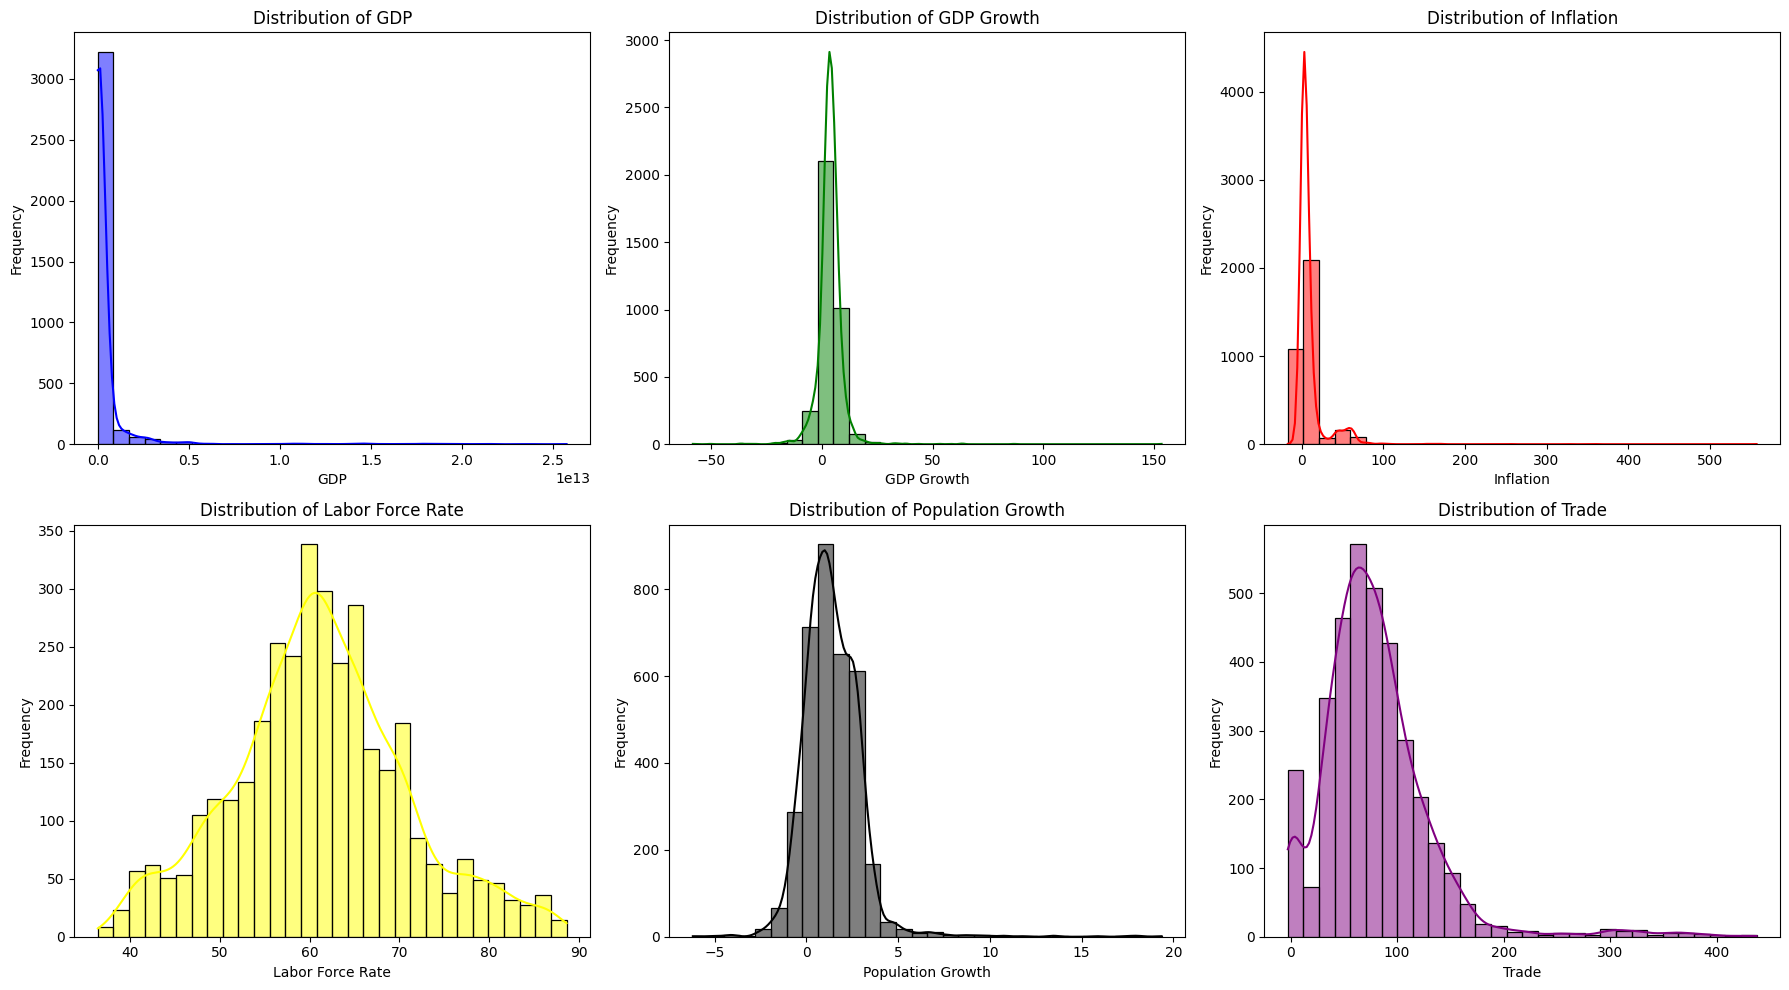

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the required columns for prediction and analysis
df = filtered_main_df[['Country Name', 'Continent', 'Year',
         'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
         'GDP (current US$)', 'GDP growth (annual %)',
         'Inflation, consumer prices (annual %)',
         'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
         'Population growth (annual %)', 'Trade (% of GDP)']]

# Rename columns for better readability
df_renamed = df.rename(columns={
    'GDP (current US$)': 'GDP',
    'GDP growth (annual %)': 'GDP Growth',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)': 'Labor Force Rate',
    'Population growth (annual %)': 'Population Growth',
    'Trade (% of GDP)': 'Trade',
    'Employment to population ratio, 15+, total (%) (modeled ILO estimate)': 'Employment Rate'
})

# **Feature Distribution (Histograms) for Input Features**
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# List of input features and their respective colors
input_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']
colors = ['blue', 'green', 'red', 'yellow', 'black', 'purple']

# Plot histograms with different colors
for i, (feature, color) in enumerate(zip(input_features, colors)):
    sns.histplot(df_renamed[feature], ax=axes[i//3, i%3], kde=True, bins=30, color=color)
    axes[i//3, i%3].set_title(f'Distribution of {feature}')
    axes[i//3, i%3].set_xlabel(feature)
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


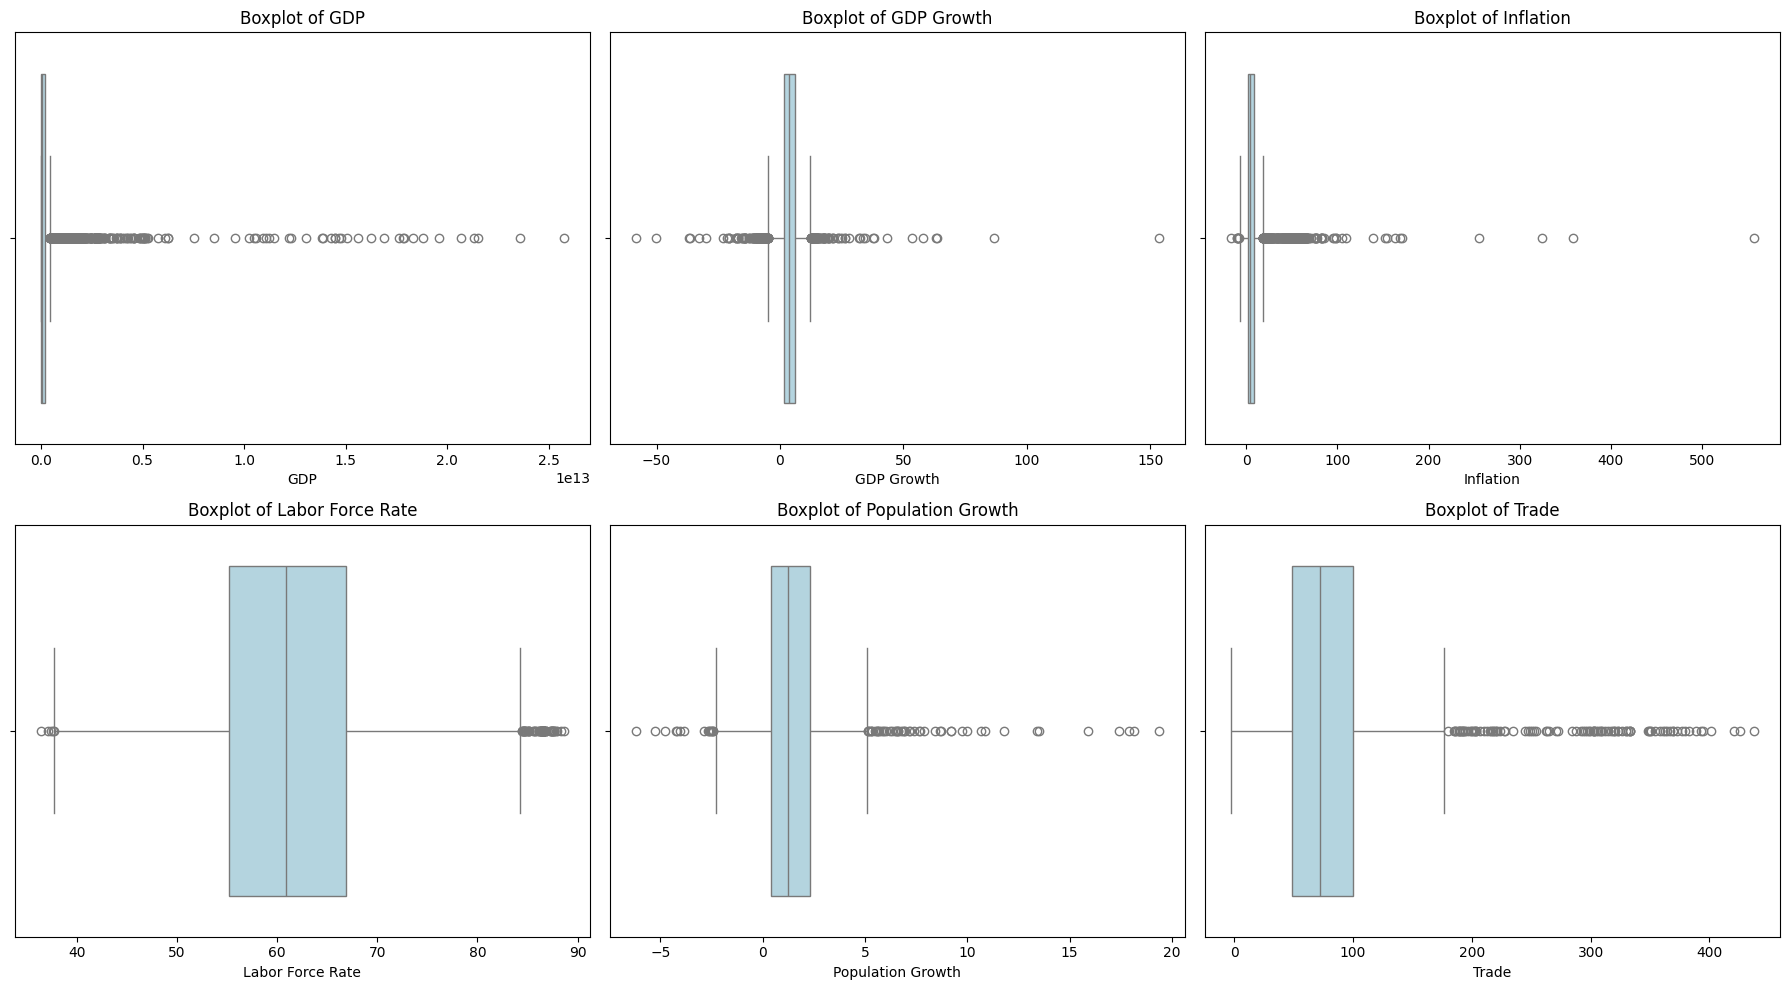

In [48]:
# Check for outliers using boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(input_features):
    sns.boxplot(x=df_renamed[feature], ax=axes[i//3, i%3], color='lightblue')
    axes[i//3, i%3].set_title(f'Boxplot of {feature}')
    axes[i//3, i%3].set_xlabel(feature)

plt.tight_layout()
plt.show()


In [49]:
from sklearn.preprocessing import StandardScaler

# Select numeric features for scaling
numeric_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric features
df_renamed[numeric_features] = scaler.fit_transform(df_renamed[numeric_features])

# Check the scaled values
print(df_renamed.head())


  Country Name Continent  Year  Employment Rate       GDP  GDP Growth  \
5  Afghanistan      Asia  2005           43.311 -0.236663    1.230864   
6  Afghanistan      Asia  2006           43.259 -0.236202    0.272020   
7  Afghanistan      Asia  2007           43.216 -0.234537    1.654843   
8  Afghanistan      Asia  2008           43.178 -0.234321    0.038131   
9  Afghanistan      Asia  2009           43.153 -0.232937    2.889944   

   Inflation  Labor Force Rate  Population Growth     Trade  
5   0.151142         -1.442052           1.381362 -1.441126  
6  -0.135433         -1.447786           1.736699 -1.430416  
7  -0.043368         -1.452700           0.256165 -1.475040  
8   0.817964         -1.456693           0.388122 -1.471062  
9  -0.795620         -1.459663           1.371759 -1.441415  


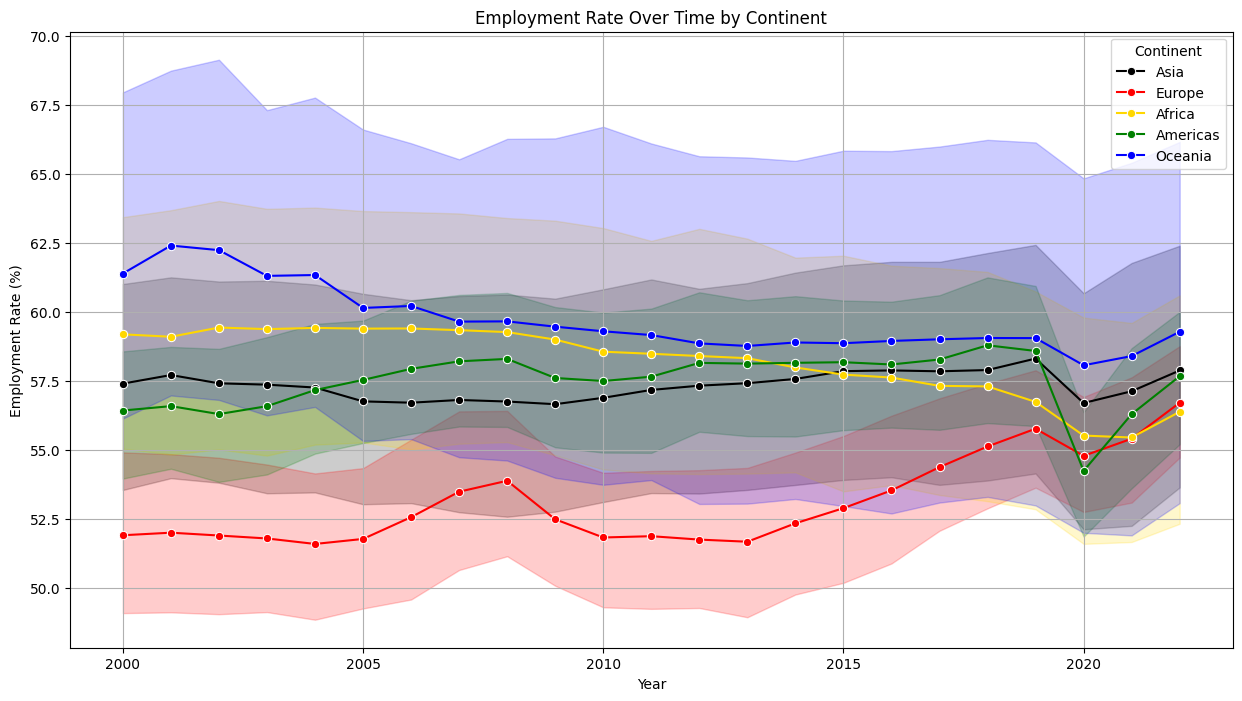

In [50]:
# Group by Continent and Year, and calculate the mean of selected features
continent_time_series = df_renamed.groupby(['Continent', 'Year']).agg({
    'Employment Rate': 'mean',
    'GDP': 'mean',
    'Inflation': 'mean',
    'Labor Force Rate': 'mean',
    'Population Growth': 'mean',
    'Trade': 'mean'
}).reset_index()

# Plot time series for each continent
continents = continent_time_series['Continent'].unique()


# Plot using seaborn's lineplot with hue to distinguish continents
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_renamed, x='Year', y='Employment Rate', hue='Continent', marker='o', palette=['black', 'red', 'gold', 'green', 'blue'])
plt.title('Employment Rate Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(title='Continent')
plt.grid(True)
plt.show()



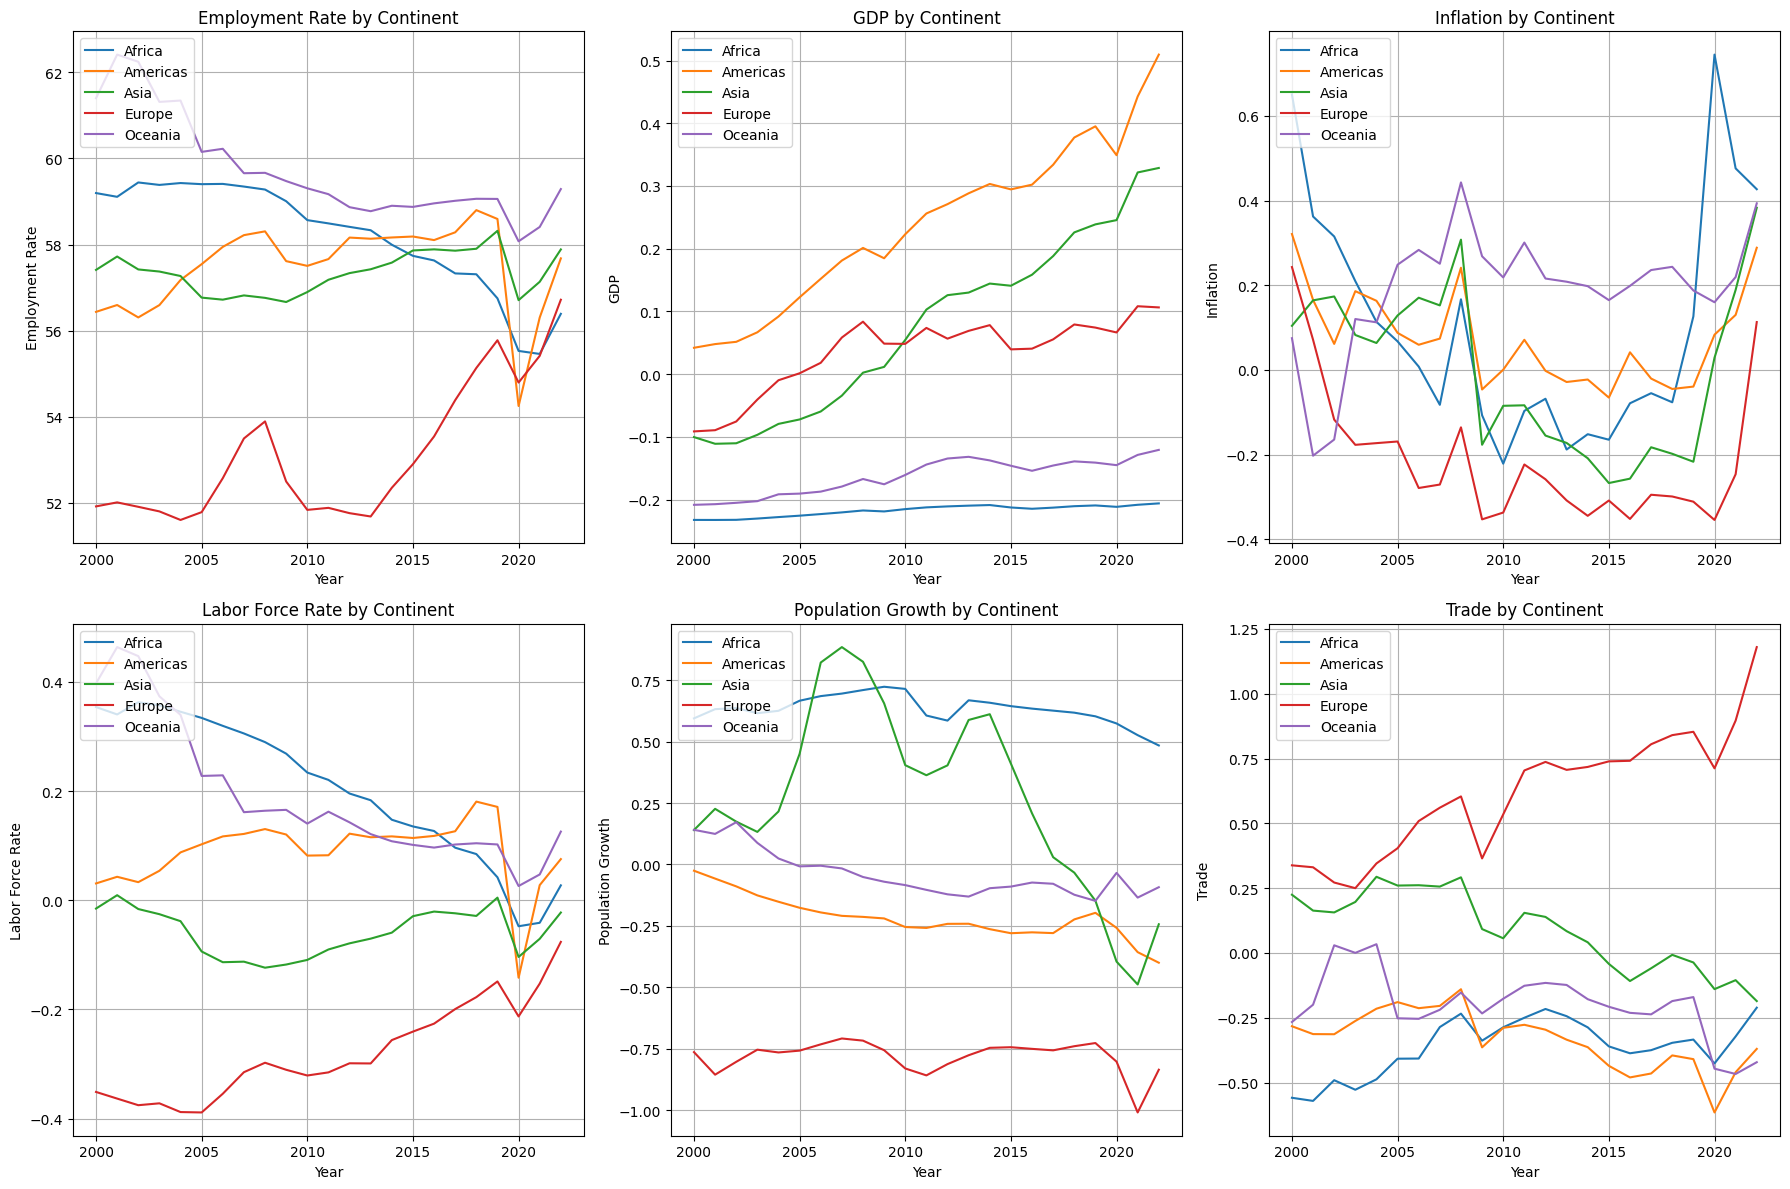

In [51]:
# Create subplots for different features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Features to plot
features = ['Employment Rate', 'GDP', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Loop through features and plot for each continent
for i, feature in enumerate(features):
    ax = axes[i//3, i%3]

    for continent in continents:
        continent_data = continent_time_series[continent_time_series['Continent'] == continent]
        ax.plot(continent_data['Year'], continent_data[feature], label=f'{continent}')

    ax.set_title(f'{feature} by Continent')
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.legend(loc='upper left')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [52]:
# Split data into training and testing based on the year
train_df = df_renamed[df_renamed['Year'] <= 2020]
test_df = df_renamed[df_renamed['Year'] > 2020]

# Separate the features (X) and target variable (y)
X_train = train_df[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_df['Employment Rate']

X_test = test_df[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_test = test_df['Employment Rate']

# Check the shape of the datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (3214, 6)
Testing data shape: (301, 6)


In [53]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the transformation
print("Scaled Training Data:\n", X_train_scaled[:5])
print("Scaled Testing Data:\n", X_test_scaled[:5])


Scaled Training Data:
 [[-0.24067767  1.39292029  0.18211442 -1.44326444  1.34469894 -1.45191028]
 [-0.24018498  0.33108941 -0.12007395 -1.44899313  1.69664141 -1.44108637]
 [-0.2384052   1.86243813 -0.02299276 -1.45390344  0.23025166 -1.48618486]
 [-0.2381735   0.07207946  0.88526601 -1.45789307  0.3609482  -1.48216532]
 [-0.23669457  3.23019772 -0.81622917 -1.46085971  1.33518772 -1.4522028 ]]
Scaled Testing Data:
 [[-0.23550831 -4.38763092  1.64432917 -2.03618424  0.89152994 -0.53253583]
 [-0.23535723 -1.76598314  1.45984167 -2.4047643   0.69351469 -0.11981848]
 [-0.23315928  0.97320345 -0.36294024 -0.24729732 -1.46963203 -0.05961279]
 [-0.23252727  0.24049835 -0.12311515 -0.08474564 -1.65015728  0.11589497]
 [-0.12523968  0.04947989 -0.09746917 -2.17735562  0.14557816 -0.61212068]]


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:\nMAE: {mae}\nMSE: {mse}\nR^2: {r2}")


Linear Regression Model Performance:
MAE: 2.089180684153083
MSE: 7.9727006385141115
R^2: 0.9314302442018243


In [55]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data into 3D array for LSTM: (samples, timesteps, features)
def reshape_for_lstm(X):
    return X.reshape((X.shape[0], 1, X.shape[1]))

# Scale the features for LSTM (scaling between 0 and 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = reshape_for_lstm(X_train_scaled)
X_test_lstm = reshape_for_lstm(X_test_scaled)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

# Predict with the model
y_pred_lstm = model.predict(X_test_lstm)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"LSTM Model Performance:")
print(f"MAE: {mae_lstm}")
print(f"MSE: {mse_lstm}")
print(f"R^2: {r2_lstm}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3307.3472
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3070.7590
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2598.6975
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2006.9028
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1487.2042
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1061.8125
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 772.3370
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 555.1422
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 409.7185
Epoch 10/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 302.4078
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 230.0409
Epoch 12/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 189.5211
Epoch 13/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 145.8354
Epoch 14/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 120.1883
Epoch 15/20
101/101 ━━━━━━━━━━━━━━

In [56]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)

xg_reg.fit(X_train_scaled, y_train)

# Predict with the model
y_pred_xgb = xg_reg.predict(X_test_scaled)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Performance:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"R^2: {r2_xgb}")


XGBoost Model Performance:
MAE: 6.694024180364767
MSE: 76.1079100227167
R^2: 0.3454287272048093


In [57]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Predict with the model
y_pred_rf = rf_reg.predict(X_test_scaled)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model Performance:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R^2: {r2_rf}")


Random Forest Model Performance:
MAE: 1.7110100996677735
MSE: 5.9491752432677725
R^2: 0.9488337124235169


In [58]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target for Random Forest model
features = df_renamed[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
target = df_renamed['Employment Rate']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Now filter the data for 2021 and 2022
actual_2021_2022 = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]

# Extract features for the prediction
features_for_prediction = actual_2021_2022[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

# Apply scaling to the features (same scaler as before, assuming you have `scaler` defined)
scaled_features = scaler.transform(features_for_prediction)

# Predict using the Random Forest model
predictions_2021_2022 = rf_model.predict(scaled_features)

# Add predictions to the actual data for comparison
actual_2021_2022['Predicted Employment Rate'] = predictions_2021_2022

# Display the comparison
print(actual_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']])


                  Country Name  Year  Employment Rate  \
21                 Afghanistan  2021           36.263   
22                 Afghanistan  2022           32.333   
45                     Albania  2021           51.336   
46                     Albania  2022           53.304   
69                     Algeria  2021           34.390   
70                     Algeria  2022           36.593   
141                     Angola  2021           64.304   
142                     Angola  2022           64.447   
189                  Argentina  2021           55.085   
190                  Argentina  2022           56.351   
213                    Armenia  2021           56.445   
214                    Armenia  2022           56.548   
261                  Australia  2021           62.478   
262                  Australia  2022           63.699   
285                    Austria  2021           57.200   
286                    Austria  2022           58.441   
309                 Azerbaijan 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
<ipython-input-58-e4400ddd0587>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_2021_2022['Predicted Employment Rate'] = predictions_2021_2022


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid with a smaller range
param_dist = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Min samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters found
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_rf_model = random_search.best_estimator_

# Predict on the test set
predictions = best_rf_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
MAE: 1.378892657251771
MSE: 3.646580353987508
R^2: 0.9714501217286209


In [60]:
# Filter data for 2000 to 2020 for training
train_data = df_renamed[(df_renamed['Year'] >= 2000) & (df_renamed['Year'] <= 2020)]

# Filter data for 2021 and 2022 for testing
test_data_2021_2022 = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]

# Separate features and target for training
X_train = train_data[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_data['Employment Rate']

# Separate features for testing
X_test_2021_2022 = test_data_2021_2022[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

# Initialize the Random Forest model (or your tuned model)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the data from 2000 to 2020
rf_model.fit(X_train, y_train)

# Predict for 2021 and 2022
predictions_2021_2022 = rf_model.predict(X_test_2021_2022)

# Add predictions to the actual data for comparison
test_data_2021_2022['Predicted Employment Rate'] = predictions_2021_2022

# Evaluate model performance (for 2021 and 2022 only)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_data_2021_2022['Employment Rate'], predictions_2021_2022)
mse = mean_squared_error(test_data_2021_2022['Employment Rate'], predictions_2021_2022)
r2 = r2_score(test_data_2021_2022['Employment Rate'], predictions_2021_2022)

import joblib

# Save the trained model to a file
joblib.dump(best_rf_model, 'random_forest_model.pkl')

print("Model saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'


<ipython-input-60-0a5c47edf0a3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_2021_2022['Predicted Employment Rate'] = predictions_2021_2022


In [61]:
from tabulate import tabulate

# Extract relevant columns for the comparison table
comparison_data = test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']]

# Convert the DataFrame to a tabular format using tabulate
table = tabulate(comparison_data, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)

# Print the evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")


+--------------------------+------+-----------------+---------------------------+
|       Country Name       | Year | Employment Rate | Predicted Employment Rate |
+--------------------------+------+-----------------+---------------------------+
|       Afghanistan        | 2021 |     36.263      |     37.44285999999995     |
|       Afghanistan        | 2022 |     32.333      |    32.918920000000014     |
|         Albania          | 2021 |     51.336      |     50.34927999999999     |
|         Albania          | 2022 |     53.304      |    54.561340000000015     |
|         Algeria          | 2021 |      34.39      |    34.517010000000035     |
|         Algeria          | 2022 |     36.593      |     37.23869999999998     |
|          Angola          | 2021 |     64.304      |     65.95795999999999     |
|          Angola          | 2022 |     64.447      |     69.61677999999996     |
|        Argentina         | 2021 |     55.085      |     55.01389000000002     |
|        Argenti

In [62]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


# Function to forecast a single feature
def forecast_feature(data, feature_name, start_year, end_year, order=(1, 1, 1)):
    """
    Forecasts a feature using ARIMA.

    Parameters:
    data (pd.DataFrame): Data containing the feature.
    feature_name (str): The name of the feature to forecast.
    start_year (int): The starting year for prediction.
    end_year (int): The ending year for prediction.
    order (tuple): ARIMA order (p, d, q).

    Returns:
    pd.DataFrame: Forecasted values with years.
    """
    series = data[feature_name]

    # Fit ARIMA model
    model = ARIMA(series, order=order)
    model_fit = model.fit()

    # Predict future values
    forecast_years = list(range(start_year, end_year + 1))
    forecast = model_fit.forecast(steps=len(forecast_years))

    # Create a DataFrame for the forecast
    forecast_df = pd.DataFrame({
        'Year': forecast_years,
        feature_name: forecast
    }).set_index('Year')

    return forecast_df

# Define the years for forecasting
start_year = 2023
end_year = 2025

# Initialize a list to store forecasts for all countries
forecasted_results = []

# Group by 'Country Name' and forecast features for each country
for country, group in df_renamed.groupby('Country Name'):
    print(f"Forecasting for country: {country}")

    # Ensure 'Year' is set as index if it's not already
    if 'Year' not in group.index.names:
        group = group.set_index('Year')

    # Drop the target variable 'Employment Rate' and select numeric input features
    input_features = group.drop(columns=['Employment Rate'], errors='ignore')
    numeric_features = input_features.select_dtypes(include=[np.number])

    # Initialize a list to store forecasts for this country
    country_forecasts = []

    for feature in numeric_features.columns:
        print(f"  Forecasting feature: {feature}...")
        forecast = forecast_feature(numeric_features, feature, start_year, end_year)
        forecast['Country Name'] = country  # Add country name to forecast
        country_forecasts.append(forecast)

    # Combine forecasts for this country
    country_forecast_df = pd.concat(country_forecasts, axis=1)
    country_forecast_df = country_forecast_df.loc[:, ~country_forecast_df.columns.duplicated()]  # Remove duplicate columns
    forecasted_results.append(country_forecast_df)

# Combine all country forecasts into a single DataFrame
final_forecasted_data = pd.concat(forecasted_results)

# Reset index to make 'Year' and 'Country Name' columns
final_forecasted_data.reset_index(inplace=True)

# Display the forecasted data
print("Final Forecasted Input Features (2023-2025) with Country:")
print(final_forecasted_data)

# Optional: Save the forecasted data to a CSV
final_forecasted_data.to_csv('country_forecasted_input_features_2023_2025.csv', index=False)


Forecasting for country: Afghanistan
  Forecasting feature: GDP...
  Forecasting feature: GDP Growth...
  Forecasting feature: Inflation...
  Forecasting feature: Labor Force Rate...
  Forecasting feature: Population Growth...
  Forecasting feature: Trade...
Forecasting for country: Albania
  Forecasting feature: GDP...
  Forecasting feature: GDP Growth...
  Forecasting feature: Inflation...
  Forecasting feature: Labor Force Rate...
  Forecasting feature: Population Growth...
  Forecasting feature: Trade...
Forecasting for country: Algeria
  Forecasting feature: GDP...
  Forecasting feature: GDP Growth...
  Forecasting feature: Inflation...
  Forecasting feature: Labor Force Rate...
  Forecasting feature: Population Growth...
  Forecasting feature: Trade...
Forecasting for country: Angola
  Forecasting feature: GDP...
  Forecasting feature: GDP Growth...
  Forecasting feature: Inflation...
  Forecasting feature: Labor Force Rate...
  Forecasting feature: Population Growth...
  Forecas

In [64]:
import pandas as pd
import joblib  # Or pickle, depending on how you saved the model

# Load the trained model
# Update 'path_to_model.pkl' to the actual path where your model is saved
trained_model = joblib.load('random_forest_model.pkl')

# Ensure input features match the model's training features
model_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Extract input features for prediction
input_data = final_forecasted_data[['Country Name', 'Year'] + model_features]

# Prepare DataFrame for predictions
predictions = []

# Group by 'Country Name' to predict for each country separately
for country, group in input_data.groupby('Country Name'):
    print(f"Predicting Employment Rate for country: {country}")

    # Extract input features
    X = group[model_features]

    # Predict employment rate for 2023–2025
    employment_predictions = trained_model.predict(X)

    # Combine predictions with the original data
    group['Employment Rate'] = employment_predictions
    predictions.append(group)

# Combine predictions for all countries
final_predictions = pd.concat(predictions)

# Display the final predictions
print("Final Employment Rate Predictions (2023–2025):")
print(final_predictions)



Predicting Employment Rate for country: Afghanistan
Predicting Employment Rate for country: Albania
Predicting Employment Rate for country: Algeria
Predicting Employment Rate for country: Angola
Predicting Employment Rate for country: Argentina
Predicting Employment Rate for country: Armenia
Predicting Employment Rate for country: Australia
Predicting Employment Rate for country: Austria
Predicting Employment Rate for country: Azerbaijan
Predicting Employment Rate for country: Bahrain
Predicting Employment Rate for country: Bangladesh
Predicting Employment Rate for country: Barbados
Predicting Employment Rate for country: Belarus
Predicting Employment Rate for country: Belgium
Predicting Employment Rate for country: Belize
Predicting Employment Rate for country: Benin
Predicting Employment Rate for country: Bhutan
Predicting Employment Rate for country: Bolivia
Predicting Employment Rate for country: Bosnia and Herzegovina
Predicting Employment Rate for country: Botswana
Predicting Emp

In [65]:
import pandas as pd
import joblib

# Load the trained model
# Update 'path_to_model.pkl' to the actual path where your model is saved
trained_model = joblib.load('random_forest_model.pkl')

# Ensure input features match the model's training features
model_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Extract input features for prediction
input_data = final_forecasted_data[['Country Name', 'Year'] + model_features]

# Prepare DataFrame for predictions
predictions = []

# Group by 'Country Name' to predict for each country separately
for country, group in input_data.groupby('Country Name'):
    print(f"Predicting Employment Rate for country: {country}")

    # Extract input features
    X = group[model_features]

    # Predict employment rate for 2023–2025
    employment_predictions = trained_model.predict(X)

    # Combine predictions with the year and country
    result = pd.DataFrame({
        'Year': group['Year'],
        'Country Name': country,
        'Employment Rate': employment_predictions
    })
    predictions.append(result)

# Combine predictions for all countries
final_predictions = pd.concat(predictions)

# Display the final predictions
print("Final Employment Rate Predictions (2023–2025):")
print(final_predictions)

# Optional: Save the predictions to a CSV
final_predictions.to_csv('employment_rate_predictions_2023_2025.csv', index=False)


Predicting Employment Rate for country: Afghanistan
Predicting Employment Rate for country: Albania
Predicting Employment Rate for country: Algeria
Predicting Employment Rate for country: Angola
Predicting Employment Rate for country: Argentina
Predicting Employment Rate for country: Armenia
Predicting Employment Rate for country: Australia
Predicting Employment Rate for country: Austria
Predicting Employment Rate for country: Azerbaijan
Predicting Employment Rate for country: Bahrain
Predicting Employment Rate for country: Bangladesh
Predicting Employment Rate for country: Barbados
Predicting Employment Rate for country: Belarus
Predicting Employment Rate for country: Belgium
Predicting Employment Rate for country: Belize
Predicting Employment Rate for country: Benin
Predicting Employment Rate for country: Bhutan
Predicting Employment Rate for country: Bolivia
Predicting Employment Rate for country: Bosnia and Herzegovina
Predicting Employment Rate for country: Botswana
Predicting Emp

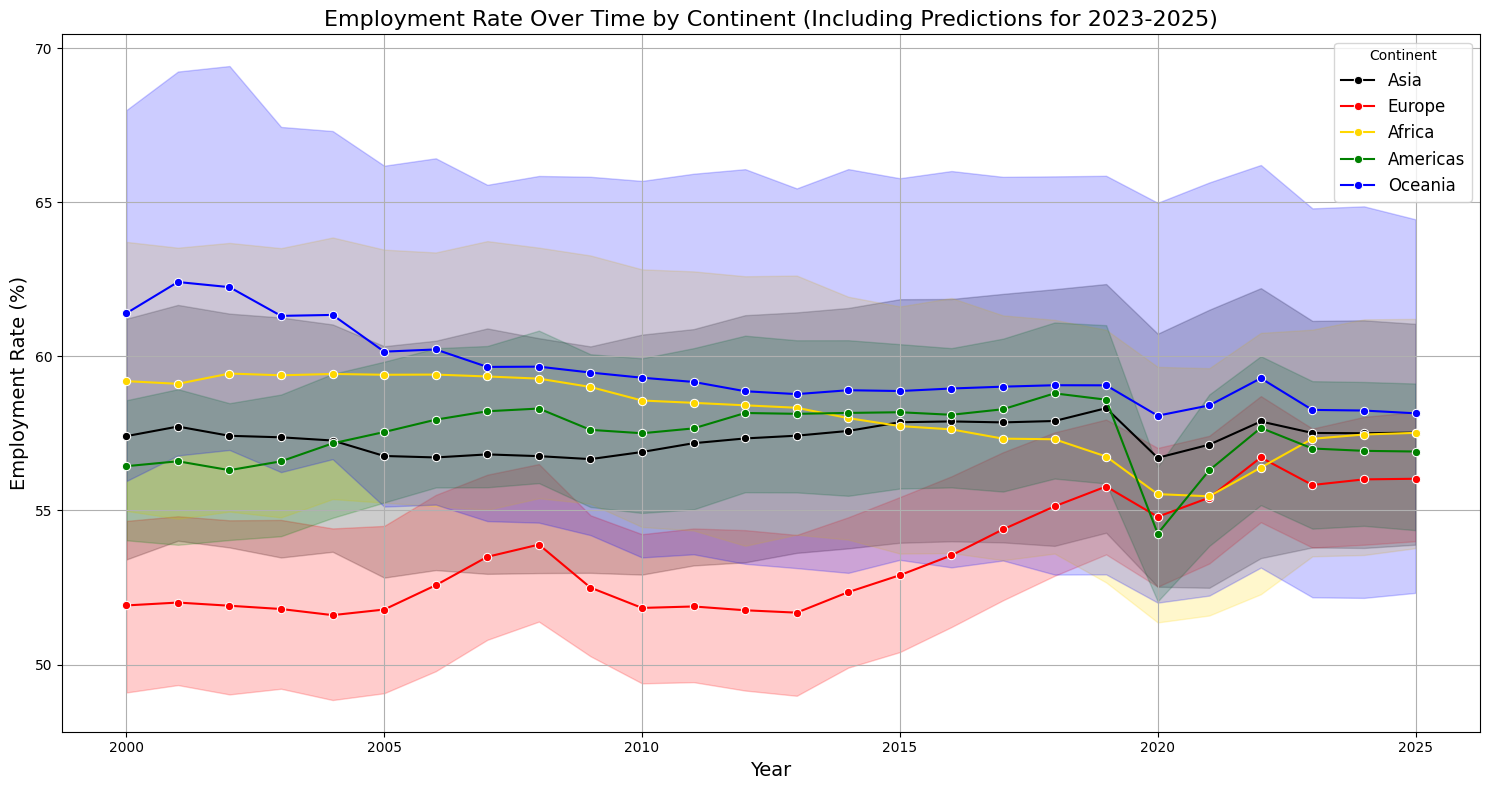

In [73]:
# Add 'Continent' to future predictions by merging with the historical data
future_data = final_predictions.merge(
    df_renamed[['Country Name', 'Continent']].drop_duplicates(),
    on='Country Name',
    how='left'
)

# Rename 'Employment Rate' in predictions to 'Predicted Employment Rate'
future_data = future_data.rename(columns={'Employment Rate': 'Predicted Employment Rate'})

# Combine historical data (df_renamed) and future predictions (future_data)
combined_data = pd.concat([
    df_renamed[['Country Name', 'Year', 'Employment Rate', 'Continent']],
    future_data[['Country Name', 'Year', 'Predicted Employment Rate', 'Continent']]
])

# Rename 'Predicted Employment Rate' to 'Employment Rate' for consistency
combined_data['Employment Rate'] = combined_data['Employment Rate'].fillna(combined_data['Predicted Employment Rate'])

# Drop the 'Predicted Employment Rate' column as it's now merged
combined_data.drop(columns=['Predicted Employment Rate'], inplace=True)

# Plot time series for each continent, including historical and predicted data
plt.figure(figsize=(15, 8))

sns.lineplot(
    data=combined_data,
    x='Year',
    y='Employment Rate',
    hue='Continent',
    marker='o',
    palette=['black', 'red', 'gold', 'green', 'blue']
)

plt.title('Employment Rate Over Time by Continent (Including Predictions for 2023-2025)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Employment Rate (%)', fontsize=14)
plt.legend(title='Continent', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [75]:
###### Aonther Approach start here

import pandas as pd
import numpy as np

# Function to forecast a single feature using trend and random noise
def forecast_feature_trend(data, feature_name, start_year, end_year):
    """
    Forecasts a feature using linear extrapolation and random noise.

    Parameters:
    data (pd.DataFrame): Data containing the feature.
    feature_name (str): The name of the feature to forecast.
    start_year (int): The starting year for prediction.
    end_year (int): The ending year for prediction.

    Returns:
    pd.DataFrame: Forecasted values with years.
    """
    # Extract historical values and corresponding years
    historical_data = data[feature_name]
    historical_years = data.index

    # Linear trend extrapolation (fit a line)
    coefficients = np.polyfit(historical_years, historical_data, 1)  # Degree 1 for linear trend
    trend = np.poly1d(coefficients)

    # Generate forecasted years
    forecast_years = list(range(start_year, end_year + 1))
    forecasted_trend = trend(forecast_years)

    # Add random noise based on historical standard deviation
    std_dev = historical_data.std()
    noise = np.random.normal(0, std_dev * 0.1, len(forecast_years))  # Adjust noise intensity

    # Combine trend and noise
    forecasted_values = forecasted_trend + noise

    # Create a DataFrame for the forecast
    forecast_df = pd.DataFrame({
        'Year': forecast_years,
        feature_name: forecasted_values
    }).set_index('Year')

    return forecast_df

# Initialize a list to store forecasts for all countries
forecasted_results = []

# Group by 'Country Name' and forecast features for each country
for country, group in df_renamed.groupby('Country Name'):
    print(f"Forecasting for country: {country}")

    # Ensure 'Year' is set as index if it's not already
    if 'Year' not in group.index.names:
        group = group.set_index('Year')

    # Drop the target variable 'Employment Rate' and select numeric input features
    input_features = group.drop(columns=['Employment Rate'], errors='ignore')
    numeric_features = input_features.select_dtypes(include=[np.number])

    # Initialize a list to store forecasts for this country
    country_forecasts = []

    for feature in numeric_features.columns:
        print(f"  Forecasting feature: {feature}...")
        forecast = forecast_feature_trend(numeric_features, feature, start_year=2023, end_year=2025)
        forecast['Country Name'] = country  # Add country name to forecast
        country_forecasts.append(forecast)

    # Combine forecasts for this country
    country_forecast_df = pd.concat(country_forecasts, axis=1)
    country_forecast_df = country_forecast_df.loc[:, ~country_forecast_df.columns.duplicated()]  # Remove duplicate columns
    forecasted_results.append(country_forecast_df)

# Combine all country forecasts into a single DataFrame
final_forecasted_data = pd.concat(forecasted_results)

# Reset index to make 'Year' and 'Country Name' columns
final_forecasted_data.reset_index(inplace=True)

# Display the forecasted data
print("Final Forecasted Input Features (2023-2025) with Country:")
print(final_forecasted_data)

# Optional: Save the forecasted data to a CSV
final_forecasted_data.to_csv('country_forecasted_input_features_trend_2023_2025.csv', index=False)




Forecasting for country: Afghanistan
  Forecasting feature: GDP...
  Forecasting feature: GDP Growth...
  Forecasting feature: Inflation...
  Forecasting feature: Labor Force Rate...
  Forecasting feature: Population Growth...
  Forecasting feature: Trade...
Forecasting for country: Albania
  Forecasting feature: GDP...
  Forecasting feature: GDP Growth...
  Forecasting feature: Inflation...
  Forecasting feature: Labor Force Rate...
  Forecasting feature: Population Growth...
  Forecasting feature: Trade...
Forecasting for country: Algeria
  Forecasting feature: GDP...
  Forecasting feature: GDP Growth...
  Forecasting feature: Inflation...
  Forecasting feature: Labor Force Rate...
  Forecasting feature: Population Growth...
  Forecasting feature: Trade...
Forecasting for country: Angola
  Forecasting feature: GDP...
  Forecasting feature: GDP Growth...
  Forecasting feature: Inflation...
  Forecasting feature: Labor Force Rate...
  Forecasting feature: Population Growth...
  Forecas

In [78]:
from joblib import load  # Or your preferred model loading method

# Load your trained model
model = load('random_forest_model.pkl')  # Replace with your model file



# Prepare the forecasted data for prediction
# Specify the exact feature columns the model was trained on
trained_feature_columns = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate',
                           'Population Growth', 'Trade']  # Replace with your actual feature names

# Select only the columns used during training
features = final_forecasted_data[trained_feature_columns]

# Predict employment rate
predictions = model.predict(features)

# Create a final DataFrame with only Country Name, Year, and Predicted Employment Rate
final_predictions = final_forecasted_data[['Country Name', 'Year']].copy()
final_predictions['Predicted Employment Rate'] = predictions

# Display the final dataset with predictions
print("Final Predicted Employment Rates (2023-2025):")
print(final_predictions)

# Optional: Save the predictions to a CSV
final_predictions.to_csv('predicted_employment_rate_2023_2025.csv', index=False)


Final Predicted Employment Rates (2023-2025):
                 Country Name  Year  Predicted Employment Rate
0                 Afghanistan  2023                  41.859810
1                 Afghanistan  2024                  42.046794
2                 Afghanistan  2025                  41.476417
3                     Albania  2023                  50.625837
4                     Albania  2024                  50.670269
5                     Albania  2025                  50.359778
6                     Algeria  2023                  38.328233
7                     Algeria  2024                  40.290690
8                     Algeria  2025                  40.340687
9                      Angola  2023                  67.596038
10                     Angola  2024                  67.790439
11                     Angola  2025                  67.494182
12                  Argentina  2023                  54.371517
13                  Argentina  2024                  54.085401
14       

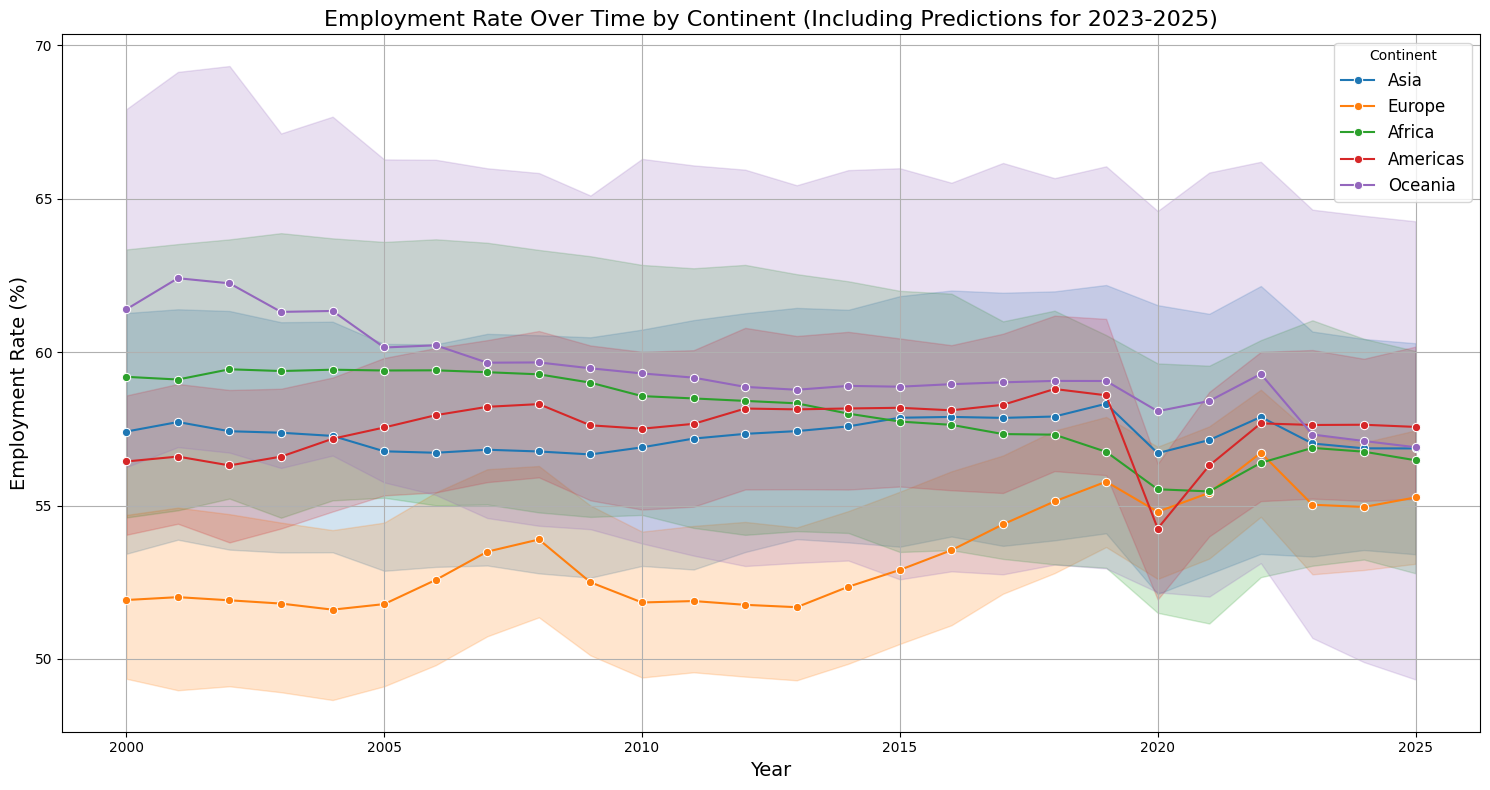

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add 'Continent' to future predictions by merging with the historical data
future_data = final_predictions.merge(
    df_renamed[['Country Name', 'Continent']].drop_duplicates(),
    on='Country Name',
    how='left'
)

# Rename 'Employment Rate' in predictions to 'Predicted Employment Rate'
future_data = future_data.rename(columns={'Employment Rate': 'Predicted Employment Rate'})

# Combine historical data (df_renamed) and future predictions (future_data)
combined_data = pd.concat([
    df_renamed[['Country Name', 'Year', 'Employment Rate', 'Continent']],
    future_data[['Country Name', 'Year', 'Predicted Employment Rate', 'Continent']]
])

# Rename 'Predicted Employment Rate' to 'Employment Rate' for consistency
combined_data['Employment Rate'] = combined_data['Employment Rate'].fillna(combined_data['Predicted Employment Rate'])

# Drop the 'Predicted Employment Rate' column as it's now merged
combined_data.drop(columns=['Predicted Employment Rate'], inplace=True)

# Plot time series for each continent, including historical and predicted data
plt.figure(figsize=(15, 8))

sns.lineplot(
    data=combined_data,
    x='Year',
    y='Employment Rate',
    hue='Continent',
    marker='o',
    palette='tab10'  # Using seaborn's default palette
)

plt.title('Employment Rate Over Time by Continent (Including Predictions for 2023-2025)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Employment Rate (%)', fontsize=14)
plt.legend(title='Continent', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


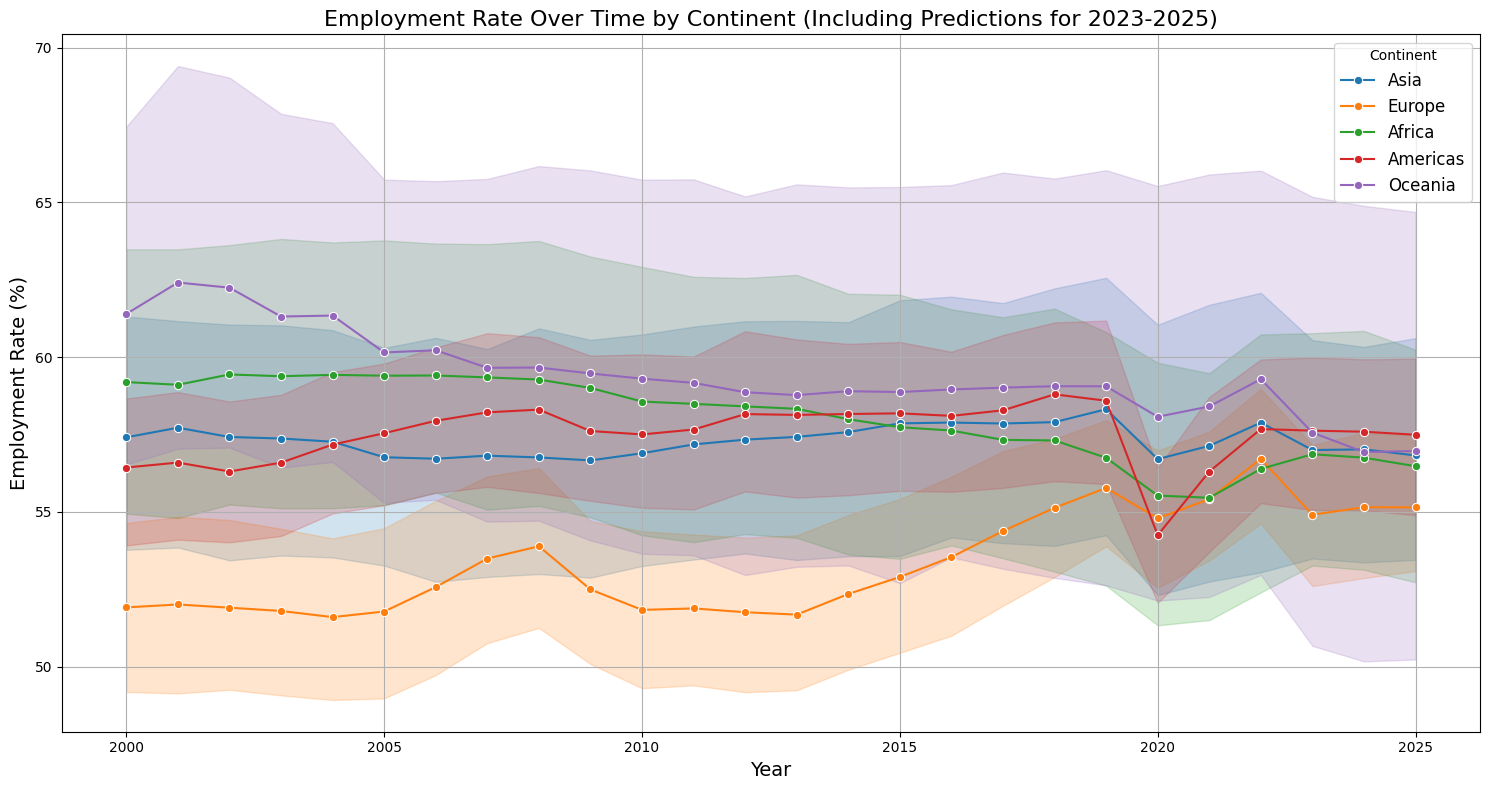

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

# Step 1: Forecast Input Features (2023–2025)
def forecast_feature_trend(data, feature_name, start_year, end_year):
    """
    Forecasts a feature using linear extrapolation and random noise.

    Parameters:
    data (pd.DataFrame): Data containing the feature.
    feature_name (str): The name of the feature to forecast.
    start_year (int): The starting year for prediction.
    end_year (int): The ending year for prediction.

    Returns:
    pd.DataFrame: Forecasted values with years.
    """
    historical_data = data[feature_name]
    historical_years = data.index
    coefficients = np.polyfit(historical_years, historical_data, 1)
    trend = np.poly1d(coefficients)
    forecast_years = list(range(start_year, end_year + 1))
    forecasted_trend = trend(forecast_years)
    std_dev = historical_data.std()
    noise = np.random.normal(0, std_dev * 0.1, len(forecast_years))  # Add small noise
    forecasted_values = forecasted_trend + noise
    return pd.DataFrame({'Year': forecast_years, feature_name: forecasted_values}).set_index('Year')

# Group by country and forecast features
forecasted_results = []
for country, group in df_renamed.groupby('Country Name'):
    group = group.set_index('Year')  # Ensure 'Year' is index
    input_features = group.drop(columns=['Employment Rate'], errors='ignore')
    numeric_features = input_features.select_dtypes(include=[np.number])
    country_forecasts = []
    for feature in numeric_features.columns:
        forecast = forecast_feature_trend(numeric_features, feature, 2023, 2025)
        forecast['Country Name'] = country
        country_forecasts.append(forecast)
    forecasted_results.append(pd.concat(country_forecasts, axis=1))
future_input_features = pd.concat(forecasted_results)

# Reset index for merging
future_input_features.reset_index(inplace=True)

# Remove duplicate columns if they exist
future_input_features = future_input_features.loc[:, ~future_input_features.columns.duplicated()]

# Step 2: Predict Employment Rate using Trained Model
model = load('random_forest_model.pkl')  # Replace with your trained model path
trained_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']  # Adjust features

# Filter input features for model prediction
features = future_input_features[trained_features]
future_input_features['Predicted Employment Rate'] = model.predict(features)

# Step 3: Combine Historical and Predicted Data
future_data = future_input_features.merge(
    df_renamed[['Country Name', 'Continent']].drop_duplicates(),
    on='Country Name',
    how='left'
)
combined_data = pd.concat([
    df_renamed[['Country Name', 'Year', 'Employment Rate', 'Continent']],
    future_data[['Country Name', 'Year', 'Predicted Employment Rate', 'Continent']]
])
combined_data['Employment Rate'] = combined_data['Employment Rate'].fillna(combined_data['Predicted Employment Rate'])
combined_data.drop(columns=['Predicted Employment Rate'], inplace=True)

# Step 4: Plot Historical and Predicted Data
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=combined_data,
    x='Year',
    y='Employment Rate',
    hue='Continent',
    marker='o',
    palette='tab10'
)
plt.title('Employment Rate Over Time by Continent (Including Predictions for 2023-2025)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Employment Rate (%)', fontsize=14)
plt.legend(title='Continent', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
